In [635]:
from web_scr import Scraper
import pandas as pd

In [636]:
sc = Scraper()
dane = sc.scrape_pages(30)

Problem with scraping website, reason: 'NoneType' object has no attribute 'get_text'
Problem with scraping website, reason: 'NoneType' object has no attribute 'get_text'
Problem with scraping website, reason: 'NoneType' object has no attribute 'get_text'
Problem with scraping website, reason: 'NoneType' object has no attribute 'get_text'
Problem with scraping website, reason: 'NoneType' object has no attribute 'get_text'
Problem with scraping website, reason: 'NoneType' object has no attribute 'get_text'
Problem with scraping website, reason: 'NoneType' object has no attribute 'get_text'
Problem with scraping website, reason: 'NoneType' object has no attribute 'get_text'
Problem with scraping website, reason: 'NoneType' object has no attribute 'get_text'
Problem with scraping website, reason: 'NoneType' object has no attribute 'get_text'
Problem with scraping website, reason: 'NoneType' object has no attribute 'get_text'
Problem with scraping website, reason: 'NoneType' object has no a

In [637]:
unique_keys = set()
for item in dane:
    for d in item:
        unique_keys.update(d.keys())

flat_dict = {key: [] for key in unique_keys}

for item in dane:
    temp_dict = {}
    for d in item:
        temp_dict.update(d)
    for key in flat_dict.keys():
        flat_dict[key].append(temp_dict.get(key, None))

df = pd.DataFrame(flat_dict)
df.to_csv('dane.csv', index=False)

In [638]:
df.sort_values(by='Cena', ascending=False)

,Leasing,Spalanie W Cyklu Mieszanym,Generacja,Skrzynia biegów,Rok produkcji,Kierownica po prawej (Anglik),Pojemność skokowa,Pojemność baterii,Liczba pozostałych rat,Kraj pochodzenia,...,Okres gwarancji producenta,Pokaż oferty z numerem VIN,Pierwszy właściciel (od nowości),Serwisowany w ASO,Liczba miejsc,Marka pojazdu,Spalanie W Mieście,Uszkodzony,Średnie zużycie,Typ nadwozia
335,None,None,II (2017-),Automatyczna,2018,None,1 997 cm3,None,None,None,...,None,Tak,Tak,Tak,7,Peugeot,5 l/100km,None,None,Kombi
20,None,None,II (2015-),Automatyczna,2016,None,1 997 cm3,None,None,Polska,...,None,Tak,None,None,5,Ford,6 l/100km,None,None,Minivan
1062,None,None,None,Automatyczna,2016,None,2 143 cm3,None,None,Austria,...,None,Tak,None,Tak,5,Mercedes-Benz,5 l/100km,None,None,Kombi
841,None,None,B9 (2015-),Automatyczna,2020,None,1 984 cm3,None,None,None,...,None,Tak,None,None,5,Audi,7 l/100km,None,None,Sedan
587,None,None,III (2015-2023),Automatyczna,2018,None,1 968 cm3,None,None,Polska,...,None,Tak,Tak,Tak,None,Skoda,None,None,None,Kombi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
940,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
946,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
966,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


### Analiza danych 
 1. Jaka marka jest najczęściej? 
 2. Wykres cen (histogram) 
 3. Wykres roku produkcji (histogram) 
 4. Procent aut z skrzynią biegów (wykres kołowy) 
 5. Procent ofert od prywatnych i firm
 6. Wykres typów 


In [639]:
marki_num= df.groupby('Marka pojazdu').size().reset_index(name='ilość')

In [640]:
marki_num

,Marka pojazdu,ilość
0,Aixam,2
1,Alfa Romeo,7
2,Audi,101
3,BMW,95
4,Chevrolet,4
5,Chrysler,4
6,Citroën,33
7,Cupra,17
8,Dacia,6
9,Daewoo,1


In [641]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Mercedes-Benz'),
  Text(1, 0, 'Audi'),
  Text(2, 0, 'BMW'),
  Text(3, 0, 'Volkswagen'),
  Text(4, 0, 'Skoda'),
  Text(5, 0, 'Ford'),
  Text(6, 0, 'Opel'),
  Text(7, 0, 'Toyota'),
  Text(8, 0, 'Renault'),
  Text(9, 0, 'Citroën'),
  Text(10, 0, 'Peugeot'),
  Text(11, 0, 'Nissan'),
  Text(12, 0, 'Kia'),
  Text(13, 0, 'Volvo'),
  Text(14, 0, 'Hyundai'),
  Text(15, 0, 'Cupra'),
  Text(16, 0, 'Mazda'),
  Text(17, 0, 'Honda'),
  Text(18, 0, 'Fiat'),
  Text(19, 0, 'Jeep')])

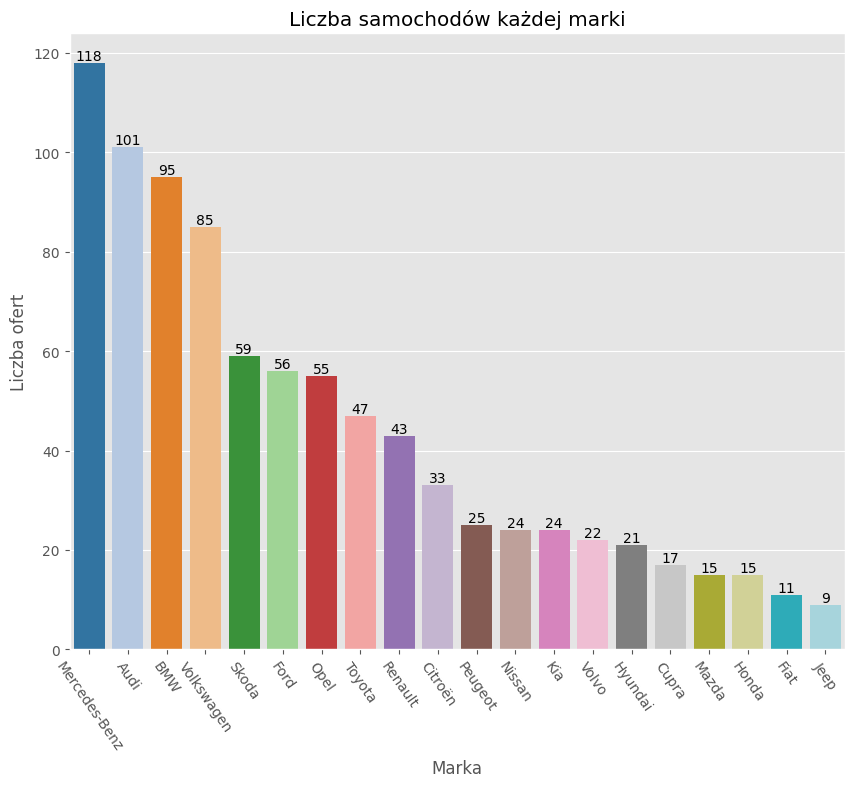

In [642]:
plt.figure(figsize=(10, 8))  
ax = sns.barplot(x='Marka pojazdu', y='ilość', data=marki_num.sort_values(by='ilość', ascending=False).head(20), orient='v', palette='tab20')
ax.bar_label(ax.containers[0], fontsize=10)
plt.xlabel('Marka')
plt.ylabel('Liczba ofert')
plt.title('Liczba samochodów każdej marki')
plt.xticks(rotation=305) 

In [643]:
ceny = df['Cena']
ceny

0       669 000
1       386 200
2       109 900
3          None
4        23 900
         ...   
1058    120 500
1059    135 000
1060      9 999
1061     45 000
1062     99 500
Name: Cena, Length: 1063, dtype: object

In [644]:
lata = df['Rok produkcji'].sort_values()

In [645]:
lata

530     1976
367     1977
553     1988
624     1991
985     1991
        ... 
934     None
940     None
946     None
966     None
1024    None
Name: Rok produkcji, Length: 1063, dtype: object

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 [Text(0, 0, '1976'),
  Text(1, 0, '1977'),
  Text(2, 0, '1988'),
  Text(3, 0, '1991'),
  Text(4, 0, '1996'),
  Text(5, 0, '1997'),
  Text(6, 0, '1999'),
  Text(7, 0, '2000'),
  Text(8, 0, '2001'),
  Text(9, 0, '2002'),
  Text(10, 0, '2003'),
  Text(11, 0, '2004'),
  Text(12, 0, '2005'),
  Text(13, 0, '2006'),
  Text(14, 0, '2007'),
  Text(15, 0, '2008'),
  Text(16, 0, '2009'),
  Text(17, 0, '2010'),
  Text(18, 0, '2011'),
  Text(19, 0, '2012'),
  Text(20, 0, '2013'),
  Text(21, 0, '2014'),
  Text(22, 0, '2015'),
  Text(23, 0, '2016'),
  Text(24, 0, '2017'),
  Text(25, 0, '2018'),
  Text(26, 0, '2019'),
  Text(27, 0, '2020'),
  Text(28, 0, '2021'),
  Text(29, 0, '2022'),
  Text(30, 0, '2023'),
  Text(31, 0, '2024')])

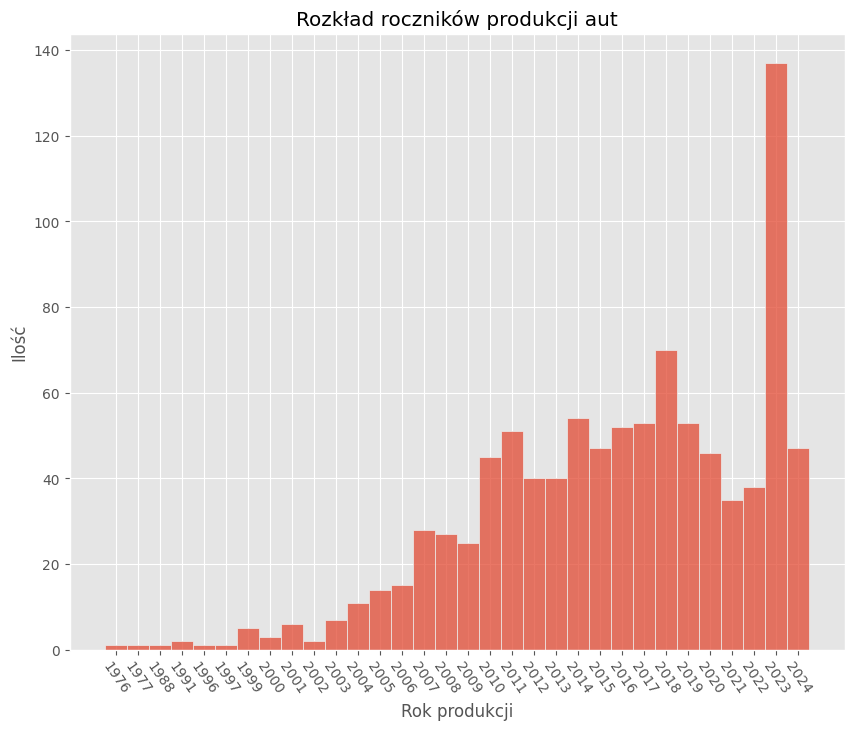

In [646]:
plt.figure(figsize=(10,8))
sns.histplot(lata, bins=10)
plt.ylabel('Ilość')
plt.xlabel('Rok produkcji')
plt.title('Rozkład roczników produkcji aut')
plt.xticks(rotation=305) 


In [647]:
biegi = df.groupby('Skrzynia biegów').size().reset_index(name='Ilość')
filt = (biegi['Skrzynia biegów'] == 'Manualna')
filt2 = (biegi['Skrzynia biegów'] == 'Automatyczna')
man = biegi[filt]['Ilość'].iloc[0]
aut = biegi[filt2]['Ilość'].iloc[0]
proc_man = round(man/(man+aut)*100, 2)
proc_aut = round(aut/(man+aut)*100, 2)
procenty = [proc_man, proc_aut]
labels = ['manualna', 'automatyczna']
procenty

[43.95, 56.05]

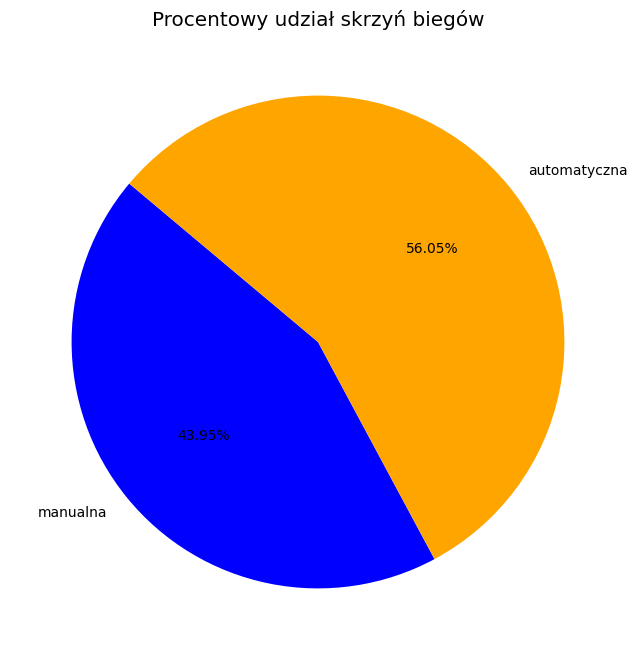

In [648]:
plt.figure(figsize=(8, 8))
plt.pie(procenty, labels=labels, autopct='%1.2f%%', startangle=140, colors=['blue', 'orange', 'gray'])
plt.title('Procentowy udział skrzyń biegów')
plt.show()

In [649]:
oferty = df.groupby('Oferta od').size().reset_index(name='Ilość')
filt = (oferty['Oferta od'] == 'Firma')
filt2 = (oferty['Oferta od'] == 'Prywatne')
f = oferty[filt]['Ilość'].iloc[0]
p = oferty[filt2]['Ilość'].iloc[0]
proc_f = round(f/(f+p)*100, 2)
proc_p = round(p/(f+p)*100, 2)
procenty = [proc_f, proc_p]
labels = ['firma', 'prywatne']
procenty

[31.42, 68.58]

In [650]:
df['Oferta od'].unique()

array(['Firma', None, 'Prywatne'], dtype=object)

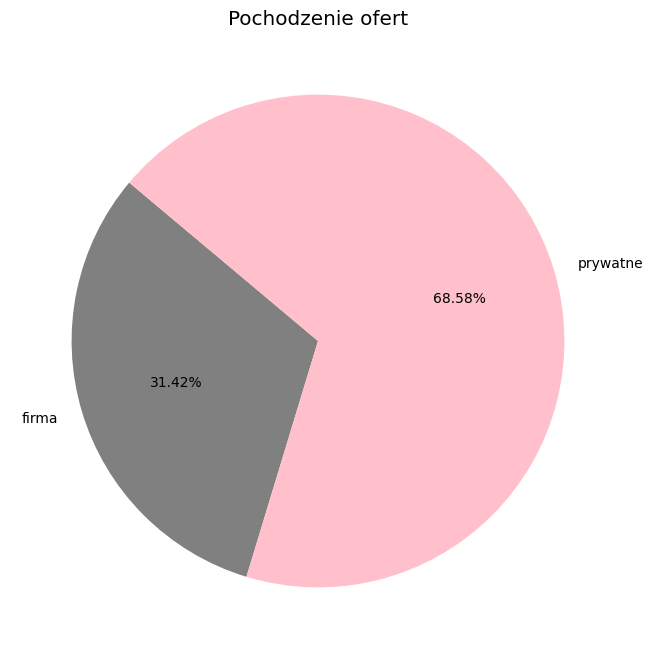

In [651]:
plt.figure(figsize=(8, 8))
plt.pie(procenty, labels=labels, autopct='%1.2f%%', startangle=140, colors=['grey', 'pink'])
plt.title('Pochodzenie ofert')
plt.show()

In [652]:
df['Typ nadwozia'].unique()

array(['Sedan', 'SUV', None, 'Kombi', 'Kompakt', 'Minivan', 'Kabriolet',
       'Coupe', 'Auta miejskie', 'Auta małe'], dtype=object)

In [653]:
typy = df.groupby('Typ nadwozia').size().reset_index(name='Ilość')

Text(0.5, 1.0, 'Liczba samochodów każdego typu')

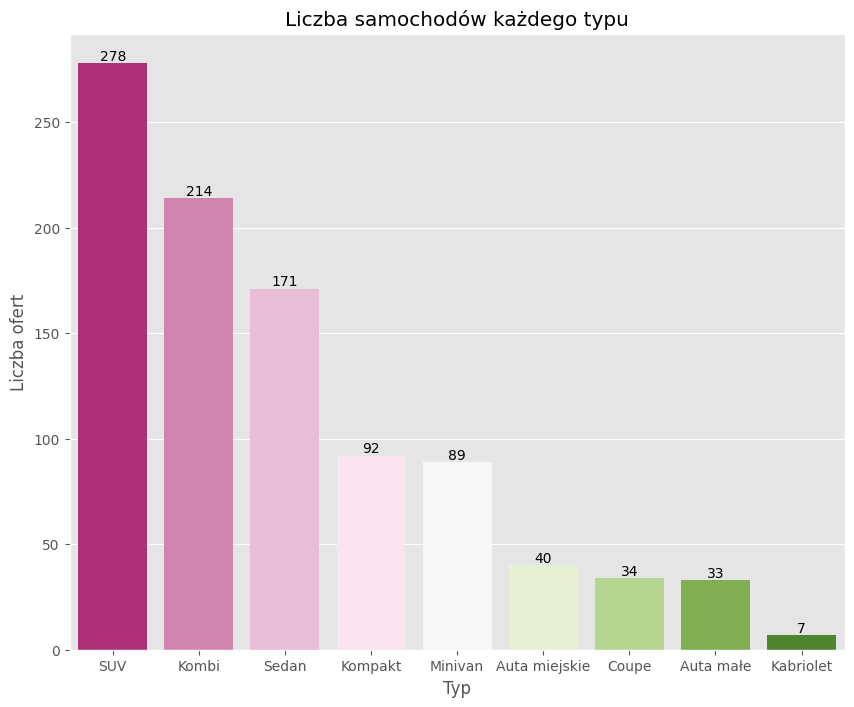

In [654]:
plt.figure(figsize=(10, 8))  
ax = sns.barplot(x='Typ nadwozia', y='Ilość', data=typy.sort_values(by='Ilość', ascending=False).head(20), orient='v', palette='PiYG')
ax.bar_label(ax.containers[0], fontsize=10)
plt.xlabel('Typ')
plt.ylabel('Liczba ofert')
plt.title('Liczba samochodów każdego typu')

In [655]:
df.columns

Index(['Leasing', 'Spalanie W Cyklu Mieszanym', 'Generacja', 'Skrzynia biegów',
       'Rok produkcji', 'Kierownica po prawej (Anglik)', 'Pojemność skokowa',
       'Pojemność baterii', 'Liczba pozostałych rat', 'Kraj pochodzenia',
       'Opłata początkowa', 'Oferta od', 'Rodzaj paliwa', 'Wartość wykupu',
       'Zarejestrowany jako zabytek', 'Rodzaj koloru', 'Moc',
       'Rodzaj własności baterii', 'Gwarancja dealerska (w cenie)', 'Napęd',
       'Tuning', 'Kolor', 'Bezwypadkowy', 'Przebieg', 'Możliwość finansowania',
       'Ma numer rejestracyjny',
       'Data pierwszej rejestracji w historii pojazdu',
       'Homologacja ciężarowa', 'Spalanie Poza Miastem', 'Model pojazdu',
       'Liczba drzwi', 'VAT marża', 'Faktura VAT',
       'Numer rejestracyjny pojazdu', 'Emisja CO2', 'Autonomia', 'Stan',
       'Cena', 'lub do (przebieg km)', 'Wersja', 'Miesięczna rata',
       'Zarejestrowany w Polsce', 'Okres gwarancji producenta',
       'Pokaż oferty z numerem VIN', 'Pierwszy właścic

In [657]:
df['Cena'] = df['Cena'].dropna().str.replace(',', '.').str.replace(' ', '').astype(float)


In [659]:
print('Najdroższa marka')

marka_cena_tan = df.groupby('Marka pojazdu')['Cena'].mean().reset_index(name='Średnia cena').sort_values(by='Średnia cena', ascending=True).head(20)
marka_cena_tan

Najdroższa marka


,Marka pojazdu,Średnia cena
9,Daewoo,4000.000000
30,Rover,10000.000000
31,Saab,13900.000000
36,Suzuki,15749.833333
4,Chevrolet,17525.000000
11,Fiat,31790.909091
21,MINI,32366.666667
6,Citroën,32605.727273
26,Opel,37007.563636
29,Renault,42488.488372


In [660]:
marka_cena_drog = df.groupby('Marka pojazdu')['Cena'].mean().reset_index(name='Średnia cena').sort_values(by='Średnia cena', ascending=False).head(20)

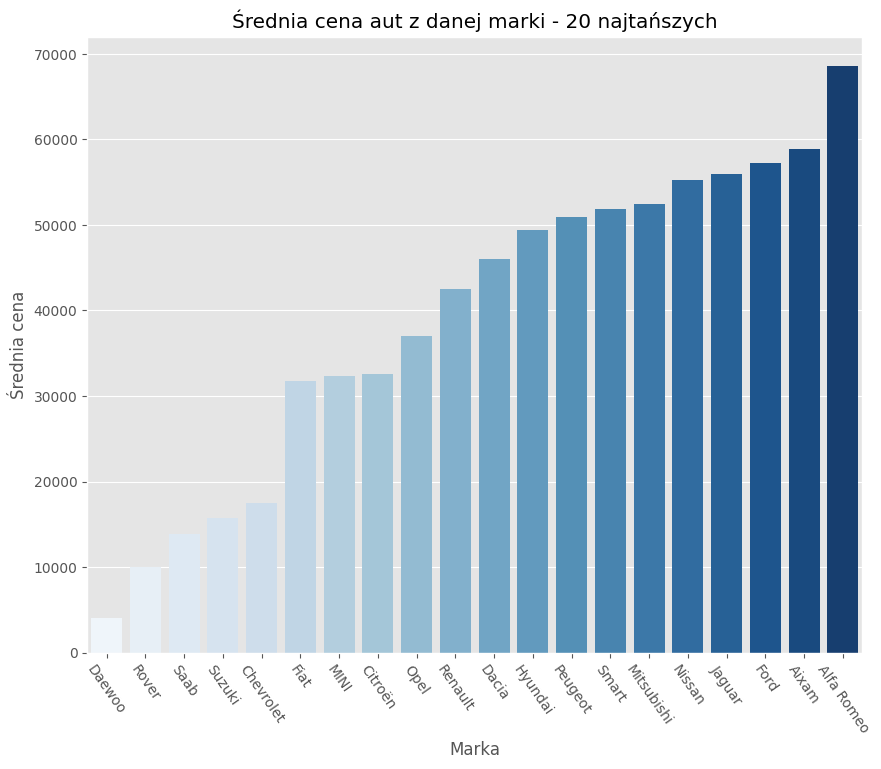

In [661]:

plt.figure(figsize=(10, 8))  
sns.barplot(x='Marka pojazdu', y='Średnia cena', data=marka_cena_tan, orient='v', palette='Blues')
plt.xlabel('Marka')
plt.ylabel('Średnia cena')
plt.title('Średnia cena aut z danej marki - 20 najtańszych')
plt.xticks(rotation=305)  # Rotacja etykiet na osi x
plt.show()

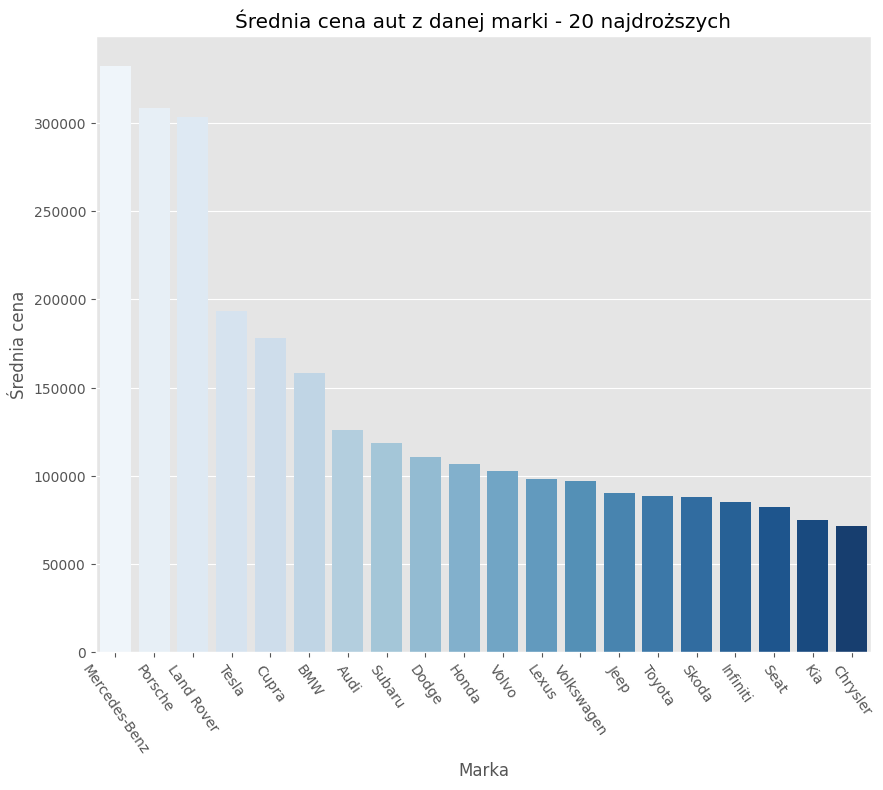

In [662]:

plt.figure(figsize=(10, 8))  
sns.barplot(x='Marka pojazdu', y='Średnia cena', data=marka_cena_drog, orient='v', palette='Blues')
plt.xlabel('Marka')
plt.ylabel('Średnia cena')
plt.title('Średnia cena aut z danej marki - 20 najdroższych')
plt.xticks(rotation=305)  # Rotacja etykiet na osi x
plt.show()

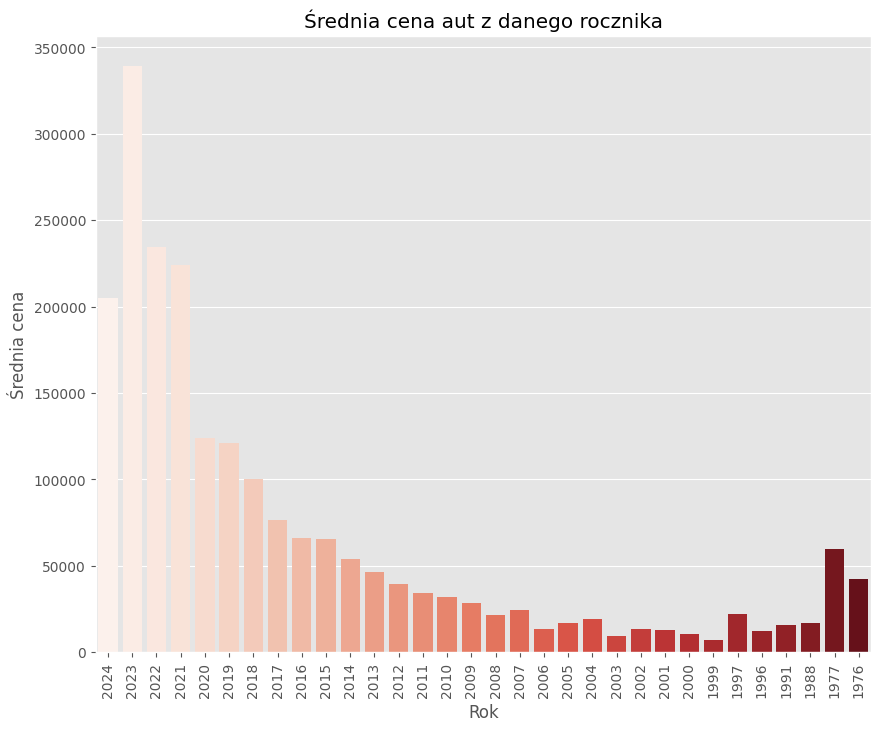

In [663]:
cena_rok = df.groupby('Rok produkcji')['Cena'].mean().reset_index(name='Średnia cena')

plt.figure(figsize=(10, 8))  
sns.barplot(x='Rok produkcji', y='Średnia cena', data=cena_rok.sort_values(by='Rok produkcji', ascending=False), orient='v', palette='Reds')
plt.xlabel('Rok')
plt.ylabel('Średnia cena')
plt.title('Średnia cena aut z danego rocznika')
plt.xticks(rotation=90)  # Rotacja etykiet na osi x
plt.show()

## Analiza i wybór cech

In [664]:
columns_value = ['Rok produkcji', 'Liczba drzwi', 'Liczba miejsc']
for i in columns_value:
    df[i] = df[i].dropna().astype(int)

In [665]:
df['Przebieg'] = df['Przebieg'].dropna().str.replace('km', '').str.replace(' ', '').astype(int)

In [666]:
df['Pojemność skokowa'] = df['Pojemność skokowa'].dropna().str.replace('cm3', '').str.replace(' ', '').astype(int)

In [667]:
df['Moc'] = df['Moc'].dropna().str.replace('KM', '').str.replace(' ', '').astype(int)

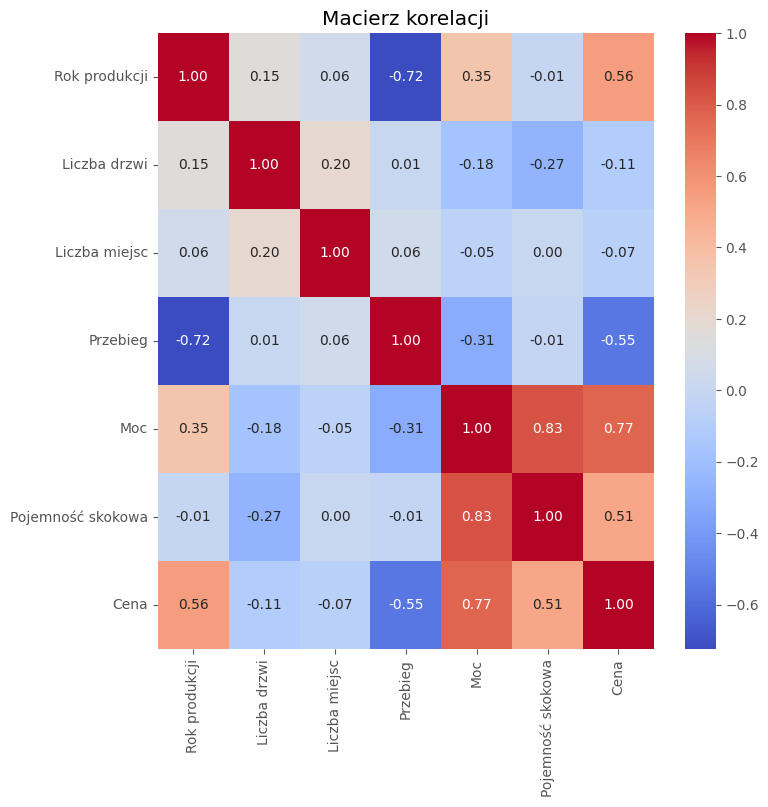

In [669]:
columns = ['Rok produkcji', 'Liczba drzwi', 'Liczba miejsc', 'Przebieg', 'Moc', 'Pojemność skokowa', 'Cena']
correlation_matrix = df[columns].corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Macierz korelacji')
plt.show()

Widzimy, że pojemność z mocą ma współczynnik 0.8, a rok z przebiegiem 0.66, największą korelacje z ceną ma moc, przebieg, rok

In [670]:
columns_feature = ['Marka pojazdu', 'Typ nadwozia', 'Skrzynia biegów', 'Rodzaj paliwa', 'Kolor', 'Stan', 'Rok produkcji', 'Liczba drzwi', 'Liczba miejsc', 'Przebieg', 'Moc', 'Pojemność skokowa', 'Cena']


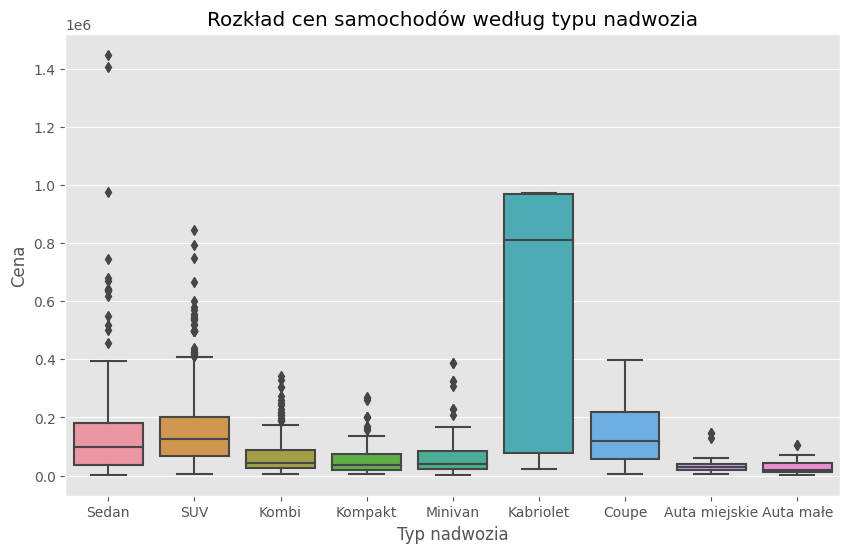

In [671]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Typ nadwozia', y='Cena', data=df)
plt.title('Rozkład cen samochodów według typu nadwozia')
plt.xlabel('Typ nadwozia')
plt.ylabel('Cena')
plt.show()

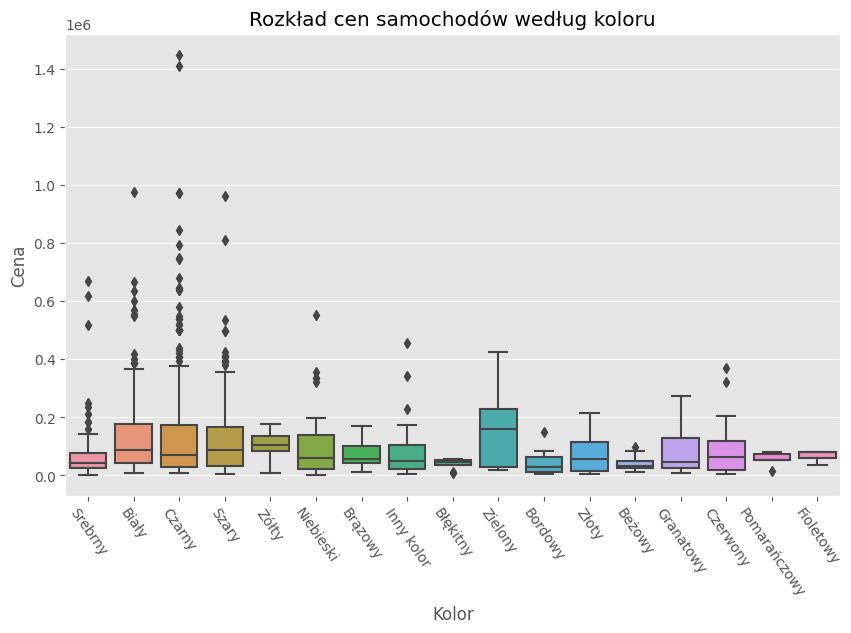

In [672]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Kolor', y='Cena', data=df)
plt.title('Rozkład cen samochodów według koloru')
plt.xlabel('Kolor')
plt.ylabel('Cena')
plt.xticks(rotation=305)
plt.show()

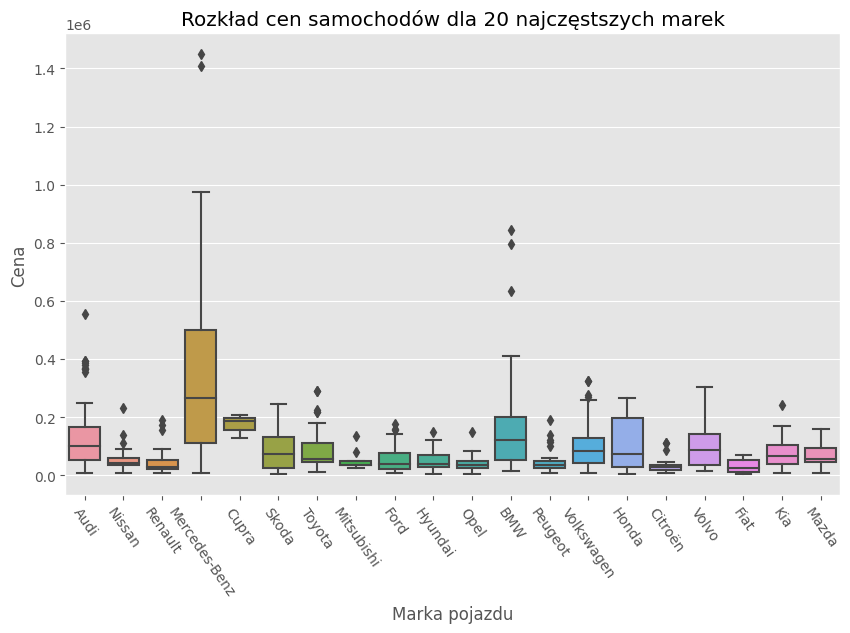

In [673]:
top_20_marki = df['Marka pojazdu'].value_counts().head(20).index

df_top_20 = df[df['Marka pojazdu'].isin(top_20_marki)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='Marka pojazdu', y='Cena', data=df_top_20)
plt.title('Rozkład cen samochodów dla 20 najczęstszych marek')
plt.xlabel('Marka pojazdu')
plt.ylabel('Cena')
plt.xticks(rotation=305)  # Obrócenie etykiet na osi X dla czytelności
plt.show()

# Ocena czy np. skrzynia wpływa na cenę auta - testy statystyczne

In [674]:
from scipy.stats import chi2_contingency

def test(cecha):
    tablica_przestawna = pd.crosstab(df[cecha], df['Cena'])
    
    chi2, p_value, dof, expected = chi2_contingency(tablica_przestawna)
    
    alpha = 0.05
    print("Wartość statystyki chi-kwadrat:", chi2)
    print("Wartość p:", p_value)
    print("Stopnie swobody:", dof)
    if p_value < alpha:
        print(f"Odrzucamy hipotezę zerową - istnieje istotny związek między {cecha} a ceną samochodu.")
    else:
        print(f"Nie ma podstaw do odrzucenia hipotezy zerowej - brak istotnego związku między {cecha} a ceną samochodu.")

In [675]:
test('Rodzaj paliwa')

Wartość statystyki chi-kwadrat: 3397.2618431201045
Wartość p: 1.499873975039772e-11
Stopnie swobody: 2865
Odrzucamy hipotezę zerową - istnieje istotny związek między Rodzaj paliwa a ceną samochodu.


In [676]:
test('Skrzynia biegów')

Wartość statystyki chi-kwadrat: 777.787939724989
Wartość p: 2.266825828334503e-08
Stopnie swobody: 573
Odrzucamy hipotezę zerową - istnieje istotny związek między Skrzynia biegów a ceną samochodu.


In [677]:
test('Stan')

Wartość statystyki chi-kwadrat: 904.0794686423293
Wartość p: 2.834106515415673e-17
Stopnie swobody: 573
Odrzucamy hipotezę zerową - istnieje istotny związek między Stan a ceną samochodu.


In [678]:
test('Kolor')

Wartość statystyki chi-kwadrat: 10134.201321778603
Wartość p: 2.529070588068813e-12
Stopnie swobody: 9168
Odrzucamy hipotezę zerową - istnieje istotny związek między Kolor a ceną samochodu.


In [679]:
test('Typ nadwozia')

Wartość statystyki chi-kwadrat: 5119.998066922122
Wartość p: 3.3247437777352844e-08
Stopnie swobody: 4584
Odrzucamy hipotezę zerową - istnieje istotny związek między Typ nadwozia a ceną samochodu.


In [680]:
test('Marka pojazdu')

Wartość statystyki chi-kwadrat: 24945.563659085718
Wartość p: 1.8125313582250974e-20
Stopnie swobody: 22920
Odrzucamy hipotezę zerową - istnieje istotny związek między Marka pojazdu a ceną samochodu.


In [681]:
def tabela_means(cecha):
    dff = df.groupby(cecha)['Cena'].mean().reset_index(name='Średnia')
    return dff[[cecha, 'Średnia']]
    

In [682]:
tabela_means('Rodzaj paliwa')

,Rodzaj paliwa,Średnia
0,Benzyna,119185.118721
1,Benzyna+LPG,29443.655172
2,Diesel,88732.755611
3,Elektryczny,375272.833333
4,Hybryda,173808.121212
5,Hybryda Plug-in,168300.000000


In [683]:
tabela_means('Skrzynia biegów')

,Skrzynia biegów,Średnia
0,Automatyczna,184512.033520
1,Manualna,38149.933492


In [684]:
tabela_means('Kolor')

,Kolor,Średnia
0,Beżowy,43134.272727
1,Biały,133545.234375
2,Bordowy,44745.363636
3,Brązowy,74374.785714
4,Błękitny,39488.666667
5,Czarny,147886.481100
6,Czerwony,84535.789474
7,Fioletowy,66100.000000
8,Granatowy,81232.142857
9,Inny kolor,79822.976744


In [685]:
tabela_means('Stan')

,Stan,Średnia
0,Nowe,321555.670807
1,Używane,79515.208281


In [686]:
tabela_means('Marka pojazdu')

,Marka pojazdu,Średnia
0,Aixam,58900.000000
1,Alfa Romeo,68578.571429
2,Audi,125770.940594
3,BMW,158112.021053
4,Chevrolet,17525.000000
5,Chrysler,71825.000000
6,Citroën,32605.727273
7,Cupra,178011.764706
8,Dacia,46033.166667
9,Daewoo,4000.000000


In [687]:
tabela_means('Typ nadwozia')

,Typ nadwozia,Średnia
0,Auta małe,29865.363636
1,Auta miejskie,38079.200000
2,Coupe,151634.529412
3,Kabriolet,555985.000000
4,Kombi,70505.425234
5,Kompakt,61155.402174
6,Minivan,72303.842697
7,SUV,172980.539568
8,Sedan,165788.304094


# Podsumowując do predykcji cen pojazdu warto wziąć takie cechy : 
- typ nadwozia
- marka pojazdu 
- stan 
- kolor
- skrzynia biegów 
- rodzaj paliwa
- moc 
- przebieg 
- rok produkcji 

In [688]:
cechy = ['Typ nadwozia', 'Marka pojazdu', 'Stan', 'Kolor', 'Skrzynia biegów', 'Rodzaj paliwa', 'Moc', 'Przebieg', 'Rok produkcji', 'Cena']
dane = df[cechy].dropna()

In [689]:
dane

,Typ nadwozia,Marka pojazdu,Stan,Kolor,Skrzynia biegów,Rodzaj paliwa,Moc,Przebieg,Rok produkcji,Cena
0,Sedan,Porsche,Używane,Srebrny,Automatyczna,Benzyna,480.0,7109.0,2022.0,669000.0
2,SUV,Nissan,Używane,Biały,Automatyczna,Benzyna,158.0,17180.0,2022.0,109900.0
4,Kombi,Renault,Używane,Czarny,Manualna,Benzyna,180.0,224000.0,2010.0,23900.0
5,SUV,Mercedes-Benz,Używane,Szary,Automatyczna,Benzyna,367.0,18000.0,2023.0,536210.0
6,SUV,Cupra,Nowe,Biały,Automatyczna,Benzyna,150.0,5.0,2023.0,154400.0
...,...,...,...,...,...,...,...,...,...,...
1058,Sedan,BMW,Używane,Biały,Automatyczna,Diesel,150.0,93600.0,2019.0,120500.0
1059,Kompakt,Audi,Nowe,Czarny,Automatyczna,Benzyna,150.0,2.0,2024.0,135000.0
1060,Sedan,Lexus,Używane,Czerwony,Manualna,Benzyna+LPG,155.0,273911.0,2000.0,9999.0
1061,Minivan,Ford,Używane,Biały,Manualna,Diesel,125.0,248000.0,2015.0,45000.0


## Encodowanie kategorialnych danych

In [690]:
dane_encoded = pd.get_dummies(dane, columns=['Typ nadwozia', 'Marka pojazdu', 'Stan', 'Kolor', 'Skrzynia biegów', 'Rodzaj paliwa'], drop_first=True, dtype=int)

dane_encoded

,Moc,Przebieg,Rok produkcji,Cena,Typ nadwozia_Auta miejskie,Typ nadwozia_Coupe,Typ nadwozia_Kabriolet,Typ nadwozia_Kombi,Typ nadwozia_Kompakt,Typ nadwozia_Minivan,...,Kolor_Szary,Kolor_Zielony,Kolor_Złoty,Kolor_Żółty,Skrzynia biegów_Manualna,Rodzaj paliwa_Benzyna+LPG,Rodzaj paliwa_Diesel,Rodzaj paliwa_Elektryczny,Rodzaj paliwa_Hybryda,Rodzaj paliwa_Hybryda Plug-in
0,480.0,7109.0,2022.0,669000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,158.0,17180.0,2022.0,109900.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,180.0,224000.0,2010.0,23900.0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
5,367.0,18000.0,2023.0,536210.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,150.0,5.0,2023.0,154400.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,150.0,93600.0,2019.0,120500.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1059,150.0,2.0,2024.0,135000.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1060,155.0,273911.0,2000.0,9999.0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1061,125.0,248000.0,2015.0,45000.0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0


## Podział na dane testowe i treningowe

In [691]:
# po to aby kolumna cena była ostatnia 
cena_column = dane_encoded.pop('Cena')
dane_encoded['Cena'] = cena_column

In [692]:
dane_encoded

,Moc,Przebieg,Rok produkcji,Typ nadwozia_Auta miejskie,Typ nadwozia_Coupe,Typ nadwozia_Kabriolet,Typ nadwozia_Kombi,Typ nadwozia_Kompakt,Typ nadwozia_Minivan,Typ nadwozia_SUV,...,Kolor_Zielony,Kolor_Złoty,Kolor_Żółty,Skrzynia biegów_Manualna,Rodzaj paliwa_Benzyna+LPG,Rodzaj paliwa_Diesel,Rodzaj paliwa_Elektryczny,Rodzaj paliwa_Hybryda,Rodzaj paliwa_Hybryda Plug-in,Cena
0,480.0,7109.0,2022.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,669000.0
2,158.0,17180.0,2022.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,109900.0
4,180.0,224000.0,2010.0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,23900.0
5,367.0,18000.0,2023.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,536210.0
6,150.0,5.0,2023.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,154400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,150.0,93600.0,2019.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,120500.0
1059,150.0,2.0,2024.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,135000.0
1060,155.0,273911.0,2000.0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,9999.0
1061,125.0,248000.0,2015.0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,45000.0


In [693]:
x = dane_encoded.iloc[:, :-1].values
y = dane_encoded.iloc[:, -1].values

In [694]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## Standaryzacja danych 

In [695]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train[:, :3])
x_test_scaled = scaler.transform(x_test[:, :3])
x_train[:, :3] = x_train_scaled
x_test[:, :3] = x_test_scaled

In [696]:
x_train

array([[-0.6910183 ,  0.29058436, -0.90844222, ...,  0.        ,
         0.        ,  0.        ],
       [-1.02232664, -0.32095022, -0.74976235, ...,  0.        ,
         0.        ,  0.        ],
       [-0.5404236 ,  0.98690009, -0.27372276, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.33963067, -0.83857627,  0.51967655, ...,  0.        ,
         0.        ,  0.        ],
       [ 3.40515748, -1.26196446,  1.154396  , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.74465115,  0.70460993,  0.04363696, ...,  0.        ,
         0.        ,  0.        ]])

## Model 

In [697]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = [1, 2, 3]
model_pol_1 = make_pipeline(PolynomialFeatures(degree[0]), LinearRegression())
model_pol_2 = make_pipeline(PolynomialFeatures(degree[1]), LinearRegression())
model_pol_3 = make_pipeline(PolynomialFeatures(degree[2]), LinearRegression())

In [698]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

model_rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200, 300]  # różne wartości liczby drzew
}

grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(x_train, y_train)

# Najlepsze parametry
print("Najlepsze parametry:", grid_search.best_params_)

# Najlepszy wynik
print("Najlepszy wynik:", -grid_search.best_score_)

Najlepsze parametry: {'n_estimators': 100}
Najlepszy wynik: 2530426901.1480875


In [702]:
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

## Walidacja

In [703]:
from sklearn.model_selection import KFold 
from sklearn.metrics import mean_squared_error
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)

def score_of_model(model):
    mse_score = []
    
    for train_index, val_index in kf.split(x_train):
        x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
        
        model.fit(x_train_fold, y_train_fold)
        
        val_pred = model.predict(x_val_fold)
        mse = mean_squared_error(y_val_fold, val_pred)
        mse_score.append(mse)
       
    mean_mse = np.mean(mse_score)
    return mean_mse


In [707]:
from sklearn.metrics import mean_absolute_percentage_error
model_pol_1.fit(x_train, y_train)
model_pol_2.fit(x_train, y_train)
model_pol_3.fit(x_train, y_train)
model_rf.fit(x_train, y_train)
y_pred_pol_1 = model_pol_1.predict(x_test)
y_pred_pol_2 = model_pol_2.predict(x_test)
y_pred_pol_3 = model_pol_3.predict(x_test)
y_pred_rf = model_rf.predict(x_test)

lista_mape = [mean_absolute_percentage_error(y_test, y_pred_pol_1), mean_absolute_percentage_error(y_test, y_pred_pol_2),  mean_absolute_percentage_error(y_test, y_pred_pol_3), mean_absolute_percentage_error(y_test, y_pred_rf)]
modele= ['linear', 'polynomial (2 degree)', 'polynomial (3 degree)', 'random forest']
bledy = pd.DataFrame()
bledy['model'] = modele
bledy['mape'] = lista_mape
bledy['score'] = [score_of_model(model_pol_1), score_of_model(model_pol_2), score_of_model(model_pol_3), score_of_model(model_rf)]
bledy

,model,mape,score
0,linear,1.129296e+00,3.720522e+34
1,polynomial (2 degree),6.149475e+11,4.587365e+31
2,polynomial (3 degree),1.806160e+11,3.534517e+31
3,random forest,2.556334e-01,3.603468e+09


## Ocena

In [708]:
def wykres(y_pred):
    plt.scatter(y_test, y_pred)


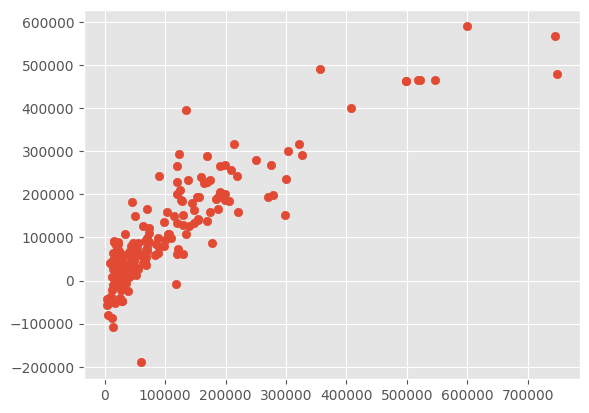

In [709]:
wykres(y_pred_pol_1)

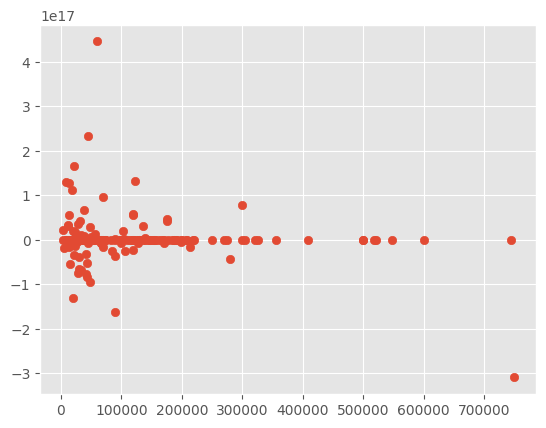

In [710]:
wykres(y_pred_pol_2)

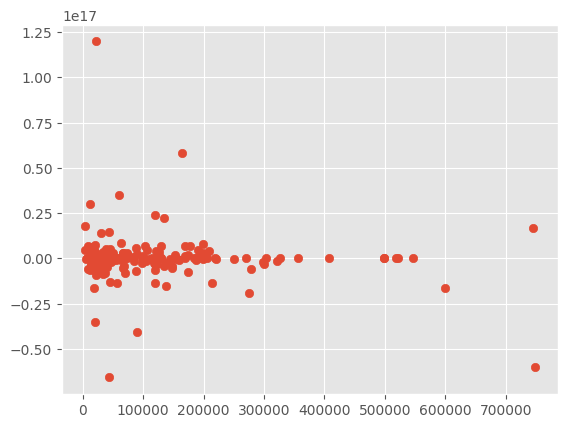

In [711]:
wykres(y_pred_pol_3)

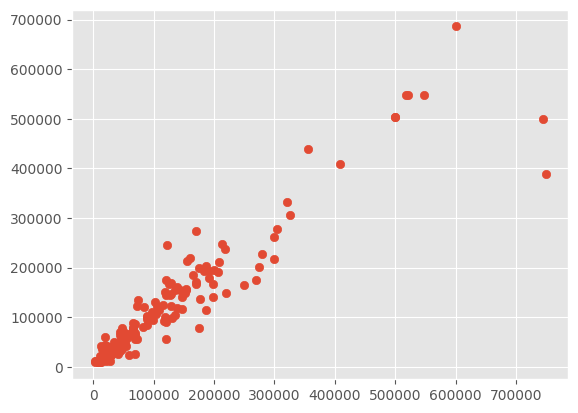

In [712]:
wykres(y_pred_rf)

In [713]:
def tabela(y_pred):
    wyniki = pd.DataFrame()
    wyniki['y_pred'] = y_pred
    wyniki['y_true'] = y_test
    return wyniki

In [714]:
tabela(y_pred_pol_1)

,y_pred,y_true
0,225850.178056,165000.0
1,142417.731475,154400.0
2,21750.327608,19900.0
3,149612.733707,114900.0
4,194662.917049,151900.0
...,...,...
186,-7271.609901,31900.0
187,159535.103126,219900.0
188,90868.455228,66000.0
189,59219.291150,48500.0


In [715]:
tabela(y_pred_pol_2)

,y_pred,y_true
0,4.421440e+05,165000.0
1,1.586240e+05,154400.0
2,1.938109e+16,19900.0
3,1.371200e+05,114900.0
4,1.950720e+05,151900.0
...,...,...
186,4.219976e+16,31900.0
187,1.248960e+05,219900.0
188,1.287680e+05,66000.0
189,-9.558339e+16,48500.0


In [716]:
tabela(y_pred_pol_3)


,y_pred,y_true
0,5.812132e+16,165000.0
1,1.570355e+05,154400.0
2,-2.194062e+15,19900.0
3,1.148320e+05,114900.0
4,2.074469e+15,151900.0
...,...,...
186,-2.256787e+15,31900.0
187,-4.371815e+14,219900.0
188,1.600841e+15,66000.0
189,1.001788e+15,48500.0


In [717]:
tabela(y_pred_rf)


,y_pred,y_true
0,183979.39,165000.0
1,156298.50,154400.0
2,13232.46,19900.0
3,124213.00,114900.0
4,149602.11,151900.0
...,...,...
186,31563.95,31900.0
187,148944.00,219900.0
188,87974.90,66000.0
189,78194.77,48500.0


In [718]:
from sklearn.metrics import r2_score

def wsp_r(y_pred):
    r_squared = r2_score(y_test, y_pred)
    print("Współczynnik determinacji (R^2):", r_squared)


In [719]:
wsp_r(y_pred_pol_1)

Współczynnik determinacji (R^2): 0.7685357510735622


In [722]:
wsp_r(y_pred_rf)

Współczynnik determinacji (R^2): 0.8903650495080956
